In [8]:
import os
import sys
sys.path.append('/home/souravc83/trading_ideas')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from src.stock import Stock, Holding, Universe
from src.backtest import BackTest
from src.linreg_strategy import LinRegStrategy
from src.factor import (
    LinRegFactor, 
    linreg_stock, 
    MovingAverageFactor,
    PercReturnFactor
)
from src.read_write import ReadData, check_valid_symbol

Executing 2019-10-01
Executing 2019-10-02
Executing 2019-10-03
Executing 2019-10-04
Executing 2019-10-07
Executing 2019-10-08
Executing 2019-10-09


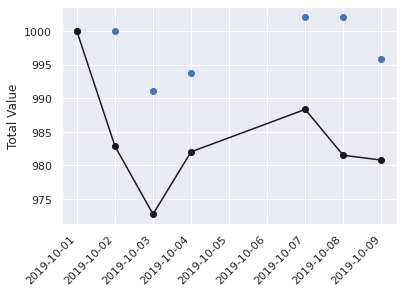

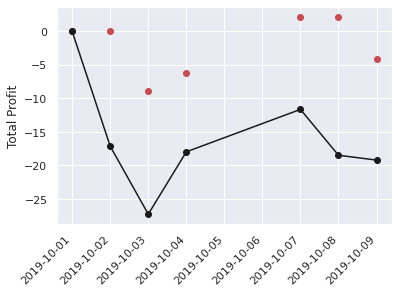

In [4]:
test_universe = Universe()
test_stocks = ['VDE','AMZN','VNQ', 'VHT','VAW',
               'VOO', 'VPU', 'VIS', 'VOX',
               'VCR', 'VDC', 'VDE']
for symbol in test_stocks:
    test_universe.add(symbol)
        
test_strategy = LinRegStrategy(
    universe=test_universe, 
    start_str='2019-10-01',
    end_str='2019-10-10',
    cash=1000,
    verbose=False
)
        
test_backtest = BackTest(
    this_strategy=test_strategy, 
    start_date='2019-10-01', 
    end_date='2019-10-10',
    verbose=False
)

test_backtest.play_backtest(visualize=True)

[0.005552868585241887, 0.006697688346804924]

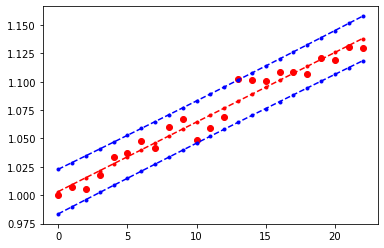

In [22]:
linreg_stock(stock_ticker='AAPL', start_date = '2019-10-16',
             end_date = '2019-11-15', visualize=True)

In [4]:
linreg = LinRegFactor(num_days=7)
stock_symbol='AAPL'
beta_mean = linreg(
    stock=Stock(stock_symbol), 
    end_date='2019-11-15',
)
beta_mean

[*********************100%***********************]  1 of 1 completed


0.00500599639909341

In [5]:
ma_fac = MovingAverageFactor(short_term=20, long_term=100)
stock_symbol='AAPL'
ma_1 = ma_fac(
    stock=Stock(stock_symbol), 
    end_date='2019-06-15',
)
ma_1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


0.9619691779545578

In [51]:
def A(**kwargs):
    print(kwargs)
    B(**kwargs)

def B(**kwargs):
    for key, value in kwargs.items():
        print(key)
        
A(a=1,b=2)

{'a': 1, 'b': 2}
a
b


In [6]:
#with open('log.txt', 'r') as f:
#    print(f.read())


In [7]:
from pandas_datareader import data as pdr
import yfinance as yf

In [8]:
yf.pdr_override() 

In [9]:
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 completed


In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,210.625656,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,211.878738,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,211.710403,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,212.467834,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,211.766541,46939700


In [5]:
import pandas as pd
sp_500_filename = '/home/souravc83/trading_ideas/src/data/sp500.csv'
valid_sp_500_filename = '/home/souravc83/trading_ideas/src/data/sp500_valid.csv'
df = pd.read_csv(sp_500_filename)

In [6]:
df.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,ABIOMED Inc,Health Care


In [16]:
#df['is_valid'] = df.Symbol.apply(check_valid_symbol)

In [9]:
df.describe()

,Symbol,Name,Sector,is_valid
count,505,505,505,505
unique,505,505,11,2
top,SPGI,Incyte,Industrials,True
freq,1,1,72,497


In [12]:
df_filtered = df.query('is_valid == True')
df_filtered.columns = ['symbol', 'name', 'sector', 'is_valid']
df_filtered = df_filtered[['symbol', 'name', 'sector']]

In [13]:
df_filtered.describe()

,symbol,name,sector
count,497,497,497
unique,497,497,11
top,SPGI,Incyte,Information Technology
freq,1,1,71


In [14]:
df_filtered.to_csv(path_or_buf=valid_sp_500_filename, index=False, header=True)

In [19]:
A = ReadData('AAPL')
df_a = A.get_data(start_date='2019-12-02', end_date='2019-12-06')

B = ReadData('MMM')
df_b = B.get_data(start_date='2019-12-02', end_date='2019-12-06')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [56]:
def prep_df_join(df: pd.DataFrame, symbol: str) -> pd.DataFrame:
    df['symbol'] = symbol
    df['date'] = df.index
    return df

def make_big_dataframe(symbol_list, start_date='2019-12-02', end_date='2019-12-06'):
    df_list = []
    for symbol in symbol_list:
        try:
            A = ReadData(symbol)
            df = A.get_data(start_date=start_date, end_date=end_date)
            df = prep_df_join(df, symbol)
            #print(df)
            df_list.append(df)
        except:
            pass
    #print(df_list)
    big_df = pd.concat(df_list, ignore_index=True)
    return big_df

def store_all_data(start_date: str = '2015-01-02' , end_date: str = '2020-06-21'):
    valid_sp_500_filename = '/home/souravc83/trading_ideas/src/data/sp500_valid.csv'
    offline_filename = '/home/souravc83/trading_ideas/src/data/offline_price_data.csv'
    df = pd.read_csv(valid_sp_500_filename)
    symbol_list = list(df['symbol'].values)
    
    big_df = make_big_dataframe(symbol_list, start_date, end_date)
    big_df.to_csv(path_or_buf=offline_filename, index=False, header=True)
    
    

In [3]:
#store_all_data()


In [44]:
A = ReadData('AAPL')
df_a = A.get_data(start_date='2015-01-02', end_date='2020-06-21')
df_a.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1.376000e+03
mean,166.680923,168.348924,165.149680,166.836279,161.484551,3.652649e+07
std,58.780773,59.687638,58.139322,59.023013,61.147703,1.811298e+07
min,90.000000,91.669998,89.470001,90.339996,84.962914,1.136200e+07
25%,116.847500,117.829998,116.075001,117.039999,109.958399,2.420278e+07
50%,156.320000,157.605003,154.870003,156.159996,150.698685,3.201850e+07
75%,198.457493,199.857506,196.242504,198.482498,195.790348,4.385522e+07
max,355.149994,356.559998,351.089996,352.839996,352.839996,1.622063e+08


In [51]:
df_big.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4.128000e+03
mean,131.845894,133.001097,130.687573,131.895770,124.785706,1.348821e+07
std,70.932857,71.584358,70.351952,71.017946,68.330824,1.939298e+07
min,27.075001,27.360001,25.045000,27.115000,25.110924,2.042000e+05
25%,54.274999,54.587501,53.825002,54.290001,51.997970,1.419125e+06
50%,146.360001,147.709999,144.889999,146.239998,135.040535,2.360100e+06
75%,180.537498,181.604996,179.299999,180.462505,172.971207,2.421738e+07
max,355.149994,356.559998,351.089996,352.839996,352.839996,1.622063e+08


In [64]:
offline_filename = '/home/souravc83/trading_ideas/src/data/offline_price_data.csv'
all_df = pd.read_csv(offline_filename)
all_df['date'] = pd.to_datetime(all_df['date'])

In [65]:
all_df.head()

,Open,High,Low,Close,Adj Close,Volume,symbol,date
0,164.710007,165.080002,162.729996,164.059998,140.665863,2116400.0,MMM,2015-01-02
1,163.000000,163.639999,160.080002,160.360001,137.493500,3692900.0,MMM,2015-01-05
2,160.820007,161.369995,157.740005,158.649994,136.027313,3532000.0,MMM,2015-01-06
3,159.899994,160.279999,158.940002,159.800003,137.013367,3081300.0,MMM,2015-01-07
4,160.649994,163.690002,160.520004,163.630005,140.297195,3142900.0,MMM,2015-01-08


In [66]:
all_df.query("symbol=='MMM'").head()

,Open,High,Low,Close,Adj Close,Volume,symbol,date
0,164.710007,165.080002,162.729996,164.059998,140.665863,2116400.0,MMM,2015-01-02
1,163.000000,163.639999,160.080002,160.360001,137.493500,3692900.0,MMM,2015-01-05
2,160.820007,161.369995,157.740005,158.649994,136.027313,3532000.0,MMM,2015-01-06
3,159.899994,160.279999,158.940002,159.800003,137.013367,3081300.0,MMM,2015-01-07
4,160.649994,163.690002,160.520004,163.630005,140.297195,3142900.0,MMM,2015-01-08


In [67]:
all_df.query("symbol=='AAPL'").head()

,Open,High,Low,Close,Adj Close,Volume,symbol,date
64672,111.389999,111.440002,107.349998,109.330002,99.945885,53204600.0,AAPL,2015-01-02
64673,108.290001,108.650002,105.410004,106.250000,97.130241,64285500.0,AAPL,2015-01-05
64674,106.540001,107.430000,104.629997,106.260002,97.139420,65797100.0,AAPL,2015-01-06
64675,107.199997,108.199997,106.699997,107.750000,98.501518,40105900.0,AAPL,2015-01-07
64676,109.230003,112.150002,108.699997,111.889999,102.286186,59364500.0,AAPL,2015-01-08


In [75]:
from datetime import datetime
start_date = datetime.strptime('2019-10-10', '%Y-%m-%d')
end_date = datetime.strptime('2019-10-30', '%Y-%m-%d')
filt_df = all_df.query("symbol=='AAPL'")
filt_df[(filt_df['date']>= start_date) & (filt_df['date']<= end_date)]

,Open,High,Low,Close,Adj Close,Volume,symbol,date
65873,227.929993,230.440002,227.300003,230.089996,228.240280,28253400.0,AAPL,2019-10-10
65874,232.949997,237.639999,232.309998,236.210007,234.311081,41698900.0,AAPL,2019-10-11
65875,234.899994,238.130005,234.669998,235.869995,233.973816,24106900.0,AAPL,2019-10-14
65876,236.389999,237.649994,234.880005,235.320007,233.428253,21840000.0,AAPL,2019-10-15
65877,233.369995,235.240005,233.199997,234.369995,232.485870,18475800.0,AAPL,2019-10-16
65878,235.089996,236.149994,233.520004,235.279999,233.388565,16896300.0,AAPL,2019-10-17
65879,234.589996,237.580002,234.289993,236.410004,234.509491,24358400.0,AAPL,2019-10-18
65880,237.520004,240.990005,237.320007,240.509995,238.576508,21811800.0,AAPL,2019-10-21
65881,241.160004,242.199997,239.619995,239.960007,238.030945,20573400.0,AAPL,2019-10-22
65882,242.100006,243.240005,241.220001,243.179993,241.225052,18957200.0,AAPL,2019-10-23


In [5]:
A = ReadData('AAPL')
df_a = A.get_data(start_date='2019-12-02', end_date='2019-12-06', online=True)
df_a

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,267.269989,268.250000,263.450012,264.160004,262.823090,23621800
2019-12-03,258.309998,259.529999,256.290009,259.450012,258.136963,28607600
2019-12-04,261.070007,263.309998,260.679993,261.739990,260.415344,16795400
2019-12-05,263.790009,265.890015,262.730011,265.579987,264.235901,18606100


In [14]:
A = ReadData('AAPL')
df_a = A.get_data(start_date='2019-12-01', end_date='2019-12-07', online=False)
df_a

,Open,High,Low,Close,Adj Close,Volume,symbol,date
65909,267.269989,268.250000,263.450012,264.160004,262.823090,23621800.0,AAPL,2019-12-02
65910,258.309998,259.529999,256.290009,259.450012,258.136963,28607600.0,AAPL,2019-12-03
65911,261.070007,263.309998,260.679993,261.739990,260.415344,16795400.0,AAPL,2019-12-04
65912,263.790009,265.890015,262.730011,265.579987,264.235901,18606100.0,AAPL,2019-12-05
65913,267.480011,271.000000,267.299988,270.709991,269.339935,26518900.0,AAPL,2019-12-06


In [11]:
perc_return = PercReturnFactor()
perc_return(Stock('AAPL'), '2019-12-07')

1.000785804547047

In [21]:
stock_ticker = 'AAPL'
start_date='2019-12-02'
end_date='2019-12-06'
this_stock = Stock(stock_ticker)
panel_data = this_stock.get_price_history(
start_date=start_date, end_date=end_date)

panel_data['x_val'] = list(range(panel_data.shape[0]))

X = panel_data['x_val']
y = panel_data['Open'].values/panel_data['Open'].values[0]

In [20]:
panel_data

,Open,x_val
65909,267.269989,0
65910,258.309998,1
65911,261.070007,2
65912,263.790009,3
65913,267.480011,4
